# Homework: Painting or Sculpure

In [1]:
from ddgs import DDGS
from fastcore.all import *

In [2]:
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [6]:
urls = search_images('abstract painting', max_images=1)
urls[0]

'https://images.pexels.com/photos/1183992/pexels-photo-1183992.jpeg?cs=srgb&dl=art-painting-abstract-1183992.jpg&fm=jpg'

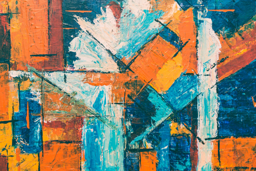

In [7]:
from fastdownload import download_url
dest = 'abstract.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

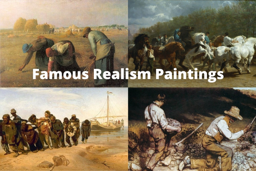

In [8]:
download_url(search_images('realism painting', max_images=1)[0], 'realism.jpg', show_progress=False)
Image.open('realism.jpg').to_thumb(256,256)

In [ ]:
searches = 'abstract','realism'
path = Path('abstract_or_realism')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} painting'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

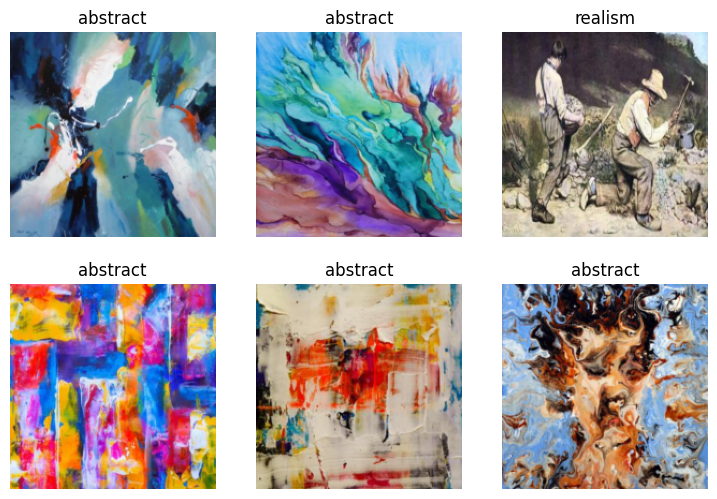

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.371482,0.414776,0.210526,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.796704,0.230743,0.105263,00:01
1,0.548279,0.091002,0.026316,00:01
2,0.391318,0.063512,0.026316,00:01
3,0.297035,0.064148,0.026316,00:01
4,0.237736,0.076436,0.026316,00:01


In [13]:
is_abstract ,_,probs = learn.predict(PILImage.create('abstract.jpg'))
print(f"This is a: {is_abstract}.")
print(f"Probability it's an abstract: {probs[0]:.4f}")

This is a: abstract.
Probability it's an abstract: 0.9988
